In [1]:
#Diego Amarilla - 19/10/2024
import pandas as pd
df = pd.read_csv('vgchartz-2024.csv')
df.shape


(64016, 14)

## Limpieza de datos con Python
### Detección y eliminación de valores duplicados


In [2]:
#Eliminar duplicados, considero duplicado si el titulo y la consola se repiten
antes = df.shape[0]
df.drop_duplicates(subset = ['title','console'], inplace=True)
despues = df.shape[0]
print(f"Se eliminaron {antes-despues} registros duplicados")

Se eliminaron 225 registros duplicados


### Verificacion y ajuste de tipos de datos       

In [3]:
df.head()   

,img,title,console,genre,publisher,developer,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,last_update
0,/games/boxart/full_6510540AmericaFrontccc.jpg,Grand Theft Auto V,PS3,Action,Rockstar Games,Rockstar North,9.4,20.32,6.37,0.99,9.85,3.12,2013-09-17,NaN
1,/games/boxart/full_5563178AmericaFrontccc.jpg,Grand Theft Auto V,PS4,Action,Rockstar Games,Rockstar North,9.7,19.39,6.06,0.60,9.71,3.02,2014-11-18,2018-01-03
2,/games/boxart/827563ccc.jpg,Grand Theft Auto: Vice City,PS2,Action,Rockstar Games,Rockstar North,9.6,16.15,8.41,0.47,5.49,1.78,2002-10-28,NaN
3,/games/boxart/full_9218923AmericaFrontccc.jpg,Grand Theft Auto V,X360,Action,Rockstar Games,Rockstar North,NaN,15.86,9.06,0.06,5.33,1.42,2013-09-17,NaN
4,/games/boxart/full_4990510AmericaFrontccc.jpg,Call of Duty: Black Ops 3,PS4,Shooter,Activision,Treyarch,8.1,15.09,6.18,0.41,6.05,2.44,2015-11-06,2018-01-14


In [4]:
df.info()
#Todas las columnas contienen el tipo apropiado de datos

<class 'pandas.core.frame.DataFrame'>
Index: 63791 entries, 0 to 64015
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   img           63791 non-null  object 
 1   title         63791 non-null  object 
 2   console       63791 non-null  object 
 3   genre         63791 non-null  object 
 4   publisher     63791 non-null  object 
 5   developer     63774 non-null  object 
 6   critic_score  6648 non-null   float64
 7   total_sales   18860 non-null  float64
 8   na_sales      12616 non-null  float64
 9   jp_sales      6690 non-null   float64
 10  pal_sales     12801 non-null  float64
 11  other_sales   15106 non-null  float64
 12  release_date  56770 non-null  object 
 13  last_update   17833 non-null  object 
dtypes: float64(6), object(8)
memory usage: 7.3+ MB


### Consistencia en valores categóricos

In [5]:
print(df['genre'].unique())
print(df['console'].unique())
#Vimos que las categorias se mantienen consistentes en todo el dataset, y no se necesitan mas cambios, pero si hubiera sido necesario hubiera usado el
#el metodo apply con la funcion title()

['Action' 'Shooter' 'Action-Adventure' 'Sports' 'Role-Playing'
 'Simulation' 'Racing' 'Music' 'Misc' 'Fighting' 'Platform' 'Adventure'
 'Strategy' 'Puzzle' 'MMO' 'Sandbox' 'Party' 'Education' 'Board Game'
 'Visual Novel']
['PS3' 'PS4' 'PS2' 'X360' 'XOne' 'PC' 'PSP' 'Wii' 'PS' 'DS' '2600' 'GBA'
 'NES' 'XB' 'PSN' 'GEN' 'PSV' 'DC' 'N64' 'SAT' 'SNES' 'GBC' 'GC' 'NS'
 '3DS' 'GB' 'WiiU' 'WS' 'VC' 'NG' 'WW' 'SCD' 'PCE' 'XBL' '3DO' 'GG' 'OSX'
 'Mob' 'PCFX' 'Series' 'All' 'iOS' '5200' 'And' 'DSiW' 'Lynx' 'Linux' 'MS'
 'ZXS' 'ACPC' 'Amig' '7800' 'DSi' 'AJ' 'WinP' 'iQue' 'GIZ' 'VB' 'Ouya'
 'NGage' 'AST' 'MSD' 'S32X' 'XS' 'PS5' 'Int' 'CV' 'Arc' 'C64' 'FDS' 'MSX'
 'OR' 'C128' 'CDi' 'CD32' 'BRW' 'FMT' 'ApII' 'Aco' 'BBCM' 'TG16']


### Manejo de valores faltantes

In [6]:
df.isna().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer          17
critic_score    57143
total_sales     44931
na_sales        51175
jp_sales        57101
pal_sales       50990
other_sales     48685
release_date     7021
last_update     45958
dtype: int64

In [7]:
#primeramente voy a eliminar los registros con menos de 7 valores non-NA
df.dropna(thresh=7, inplace=True)
df.isna().sum()

img                 0
title               0
console             0
genre               0
publisher           0
developer           6
critic_score    55521
total_sales     43309
na_sales        49553
jp_sales        55479
pal_sales       49368
other_sales     47063
release_date     5405
last_update     44336
dtype: int64

In [8]:
#luego reemplazar los developers con na, por 'Unknown', las ventas regionales por 0 y las ventas totales por la suma de las regionales
values = {'developer': 'Unknown', 'na_sales': 0, 'jp_sales': 0, 'pal_sales': 0, 'other_sales': 0}
df.fillna(value = values, inplace = True)
df['total_sales'] = df['na_sales'] + df['jp_sales'] + df['pal_sales'] + df['other_sales']
df.isna().sum()
#Critic score, release date y last update van a quedar con Na, donde no se tienen datos disponibles

img                 0
title               0
console             0
genre               0
publisher           0
developer           0
critic_score    55521
total_sales         0
na_sales            0
jp_sales            0
pal_sales           0
other_sales         0
release_date     5405
last_update     44336
dtype: int64

### Deteccion de datos anomalos

In [9]:
df.describe()
#Podemos ver que critic_score va de 1 a 10, y no se encuentran valores o negativos o demasiado grandes en las ventas

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales
count,6648.000000,62169.000000,62169.000000,62169.000000,62169.000000,62169.000000
mean,7.219404,0.106030,0.053783,0.010972,0.030807,0.010468
std,1.457125,0.473493,0.247196,0.063294,0.188296,0.065142
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.400000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.300000,0.020000,0.000000,0.000000,0.000000,0.000000
max,10.000000,20.330000,9.760000,2.130000,9.850000,3.120000


## Exploracion de datos con Python
### Visualizaciones exploratorias univariadas

In [11]:
import matplotlib.pyplot as plt

#Voy a resumir el critic score y las ventas totales, por genero y por desarrollador

genero = df.groupby('genre').agg({
    'critic_score' : 'mean',
    'total_sales' : 'sum'
})

print(genero)

                  critic_score  total_sales
genre                                      
Action                6.826172      1123.25
Action-Adventure      7.678378       148.44
Adventure             7.343797       324.53
Board Game            5.300000         0.34
Education             8.000000         0.87
Fighting              7.387538       341.06
MMO                   7.781818         9.31
Misc                  6.884593       556.11
Music                 7.992593        51.76
Party                 5.968750         6.19
Platform              7.309464       348.44
Puzzle                7.211268       126.21
Racing                7.189432       525.29
Role-Playing          7.468014       426.42
Sandbox               9.200000         1.89
Shooter               7.277752       995.21
Simulation            6.910000       299.96
Sports                7.287083      1182.60
Strategy              7.426738       118.17
Visual Novel          8.500000         5.75


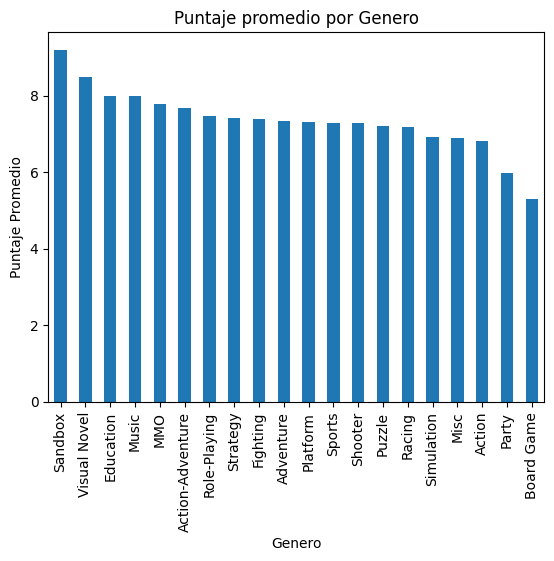

In [27]:
genero['critic_score'].sort_values(ascending=False).plot(kind='bar')
plt.title('Puntaje promedio por Genero')
plt.xlabel('Genero')
plt.ylabel('Puntaje Promedio')
plt.xticks(rotation=90)
plt.show()

#En este grafico se pueden ver en orden descendiente cuales son los generos con mejores puntajes de criticos

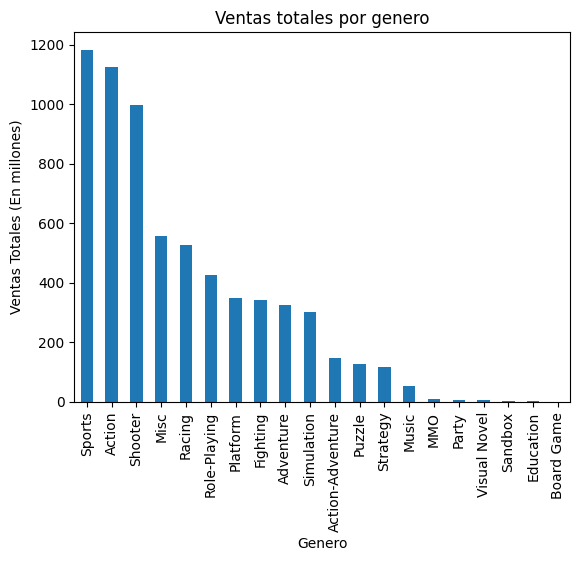

In [31]:
genero['total_sales'].sort_values(ascending=False).plot(kind='bar')
plt.title('Ventas totales por genero')
plt.xlabel('Genero')
plt.ylabel('Ventas Totales (En millones)')

plt.xticks(rotation=90)
plt.show()

#En este grafico se puede ver cuales son los generos de videojuegos que mas se venden, viendo que los juegos de deportes, accion y shooters estan muy por encima del resto.

### Visualizaciones exploratorias multivariadas

<Figure size 640x480 with 0 Axes>

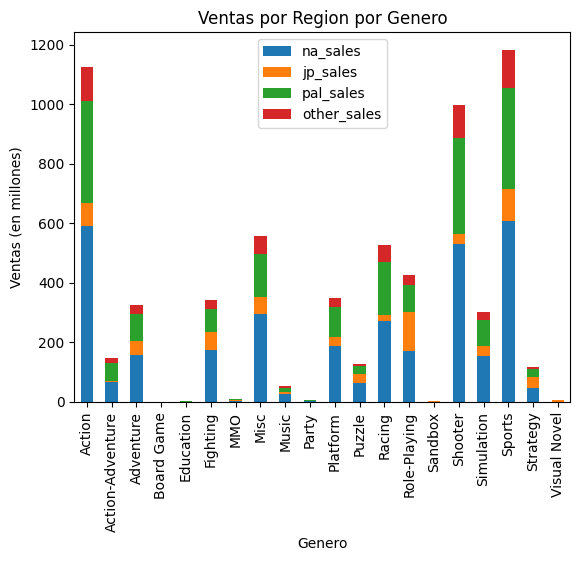

In [42]:
import seaborn as sns
plt.figure()
df.groupby('genre')[['na_sales', 'jp_sales', 'pal_sales', 'other_sales']].sum().plot(kind='bar', stacked=True)
plt.title('Ventas por Region por Genero')
plt.ylabel('Ventas (en millones)')
plt.xlabel('Genero')
plt.xticks(rotation=90)
plt.show()

#Este grafico nos muestra las ventas por Region y por Genero

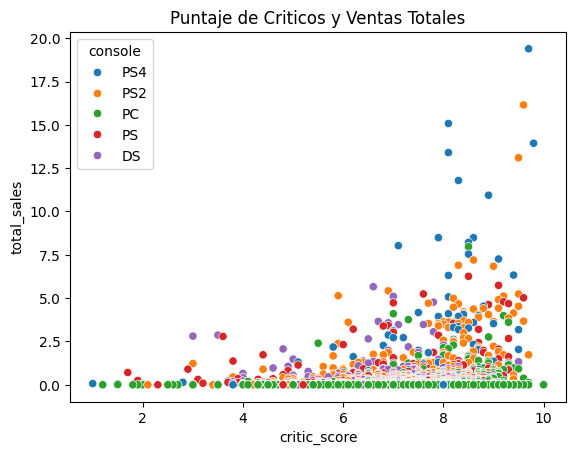

In [59]:
top_consoles = df['console'].value_counts().nlargest(5).index

df_top_consoles = df[df['console'].isin(top_consoles)]

plt.figure()
sns.scatterplot(x='critic_score', y='total_sales', hue='console', data=df_top_consoles)

plt.title('Puntaje de Criticos y Ventas Totales')
plt.show()

#Este Grafico nos muestra la relacion entre el puntaje de criticos y las ventas totales, para las 5 consolas mas populares

## Analisis adicional
### Estadisticas descriptivas

In [67]:
df.describe()

,critic_score,total_sales,na_sales,jp_sales,pal_sales,other_sales,release_date,year
count,6648.000000,62169.000000,62169.000000,62169.000000,62169.000000,62169.000000,56764,56764.000000
mean,7.219404,0.106030,0.053783,0.010972,0.030807,0.010468,2006-11-13 22:25:21.076738560,2006.358537
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1971-12-03 00:00:00,1971.000000
25%,6.400000,0.000000,0.000000,0.000000,0.000000,0.000000,2001-03-26 00:00:00,2001.000000
50%,7.500000,0.000000,0.000000,0.000000,0.000000,0.000000,2008-09-16 00:00:00,2008.000000
75%,8.300000,0.020000,0.000000,0.000000,0.000000,0.000000,2012-12-27 00:00:00,2012.000000
max,10.000000,20.330000,9.760000,2.130000,9.850000,3.120000,2024-12-31 00:00:00,2024.000000
std,1.457125,0.473493,0.247196,0.063294,0.188296,0.065142,NaN,8.622138


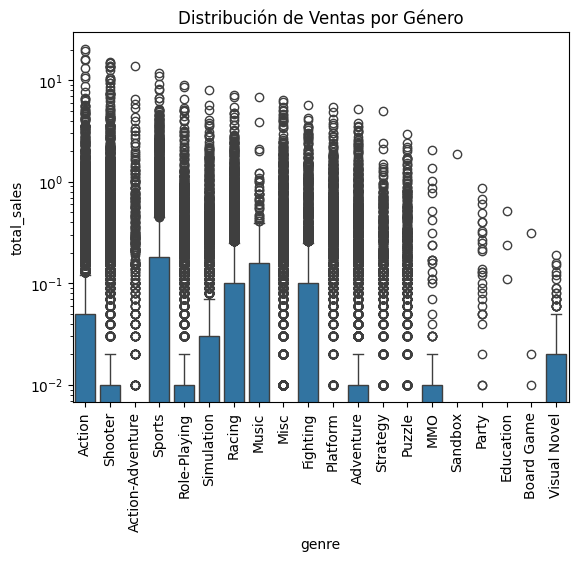

In [66]:
plt.figure()
sns.boxplot(x='genre', y='total_sales', data=df)
plt.yscale('log')
plt.xticks(rotation=90)
plt.title('Distribución de Ventas por Género')
plt.show()


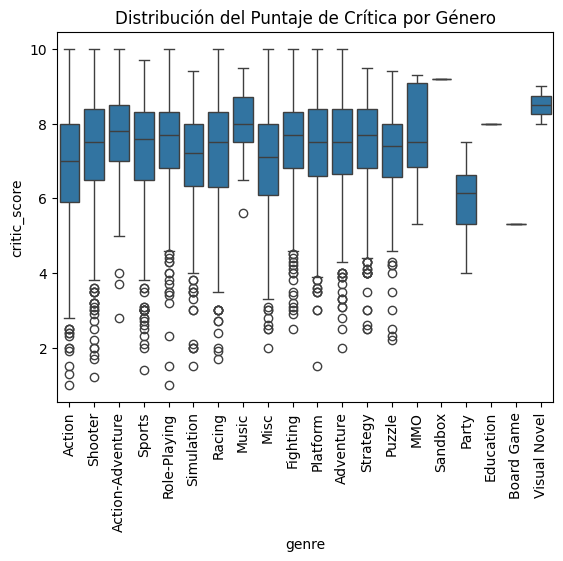

In [68]:
plt.figure()
sns.boxplot(x='genre', y='critic_score', data=df)
plt.xticks(rotation=90)
plt.title('Distribución del Puntaje de Crítica por Género')
plt.show()


### Identificacion de tendencias

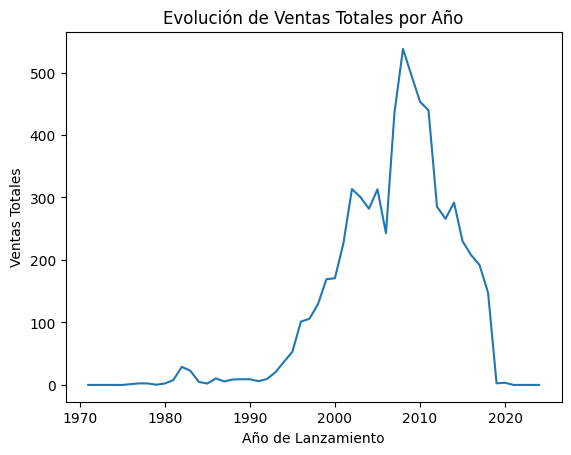

In [70]:
#Como vimos anteriormente, algunos generos de juegos suelen ser mucho mas populares que otros

df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')

# Agrupar las ventas por año de lanzamiento
df['year'] = df['release_date'].dt.year
sales_per_year = df.groupby('year')['total_sales'].sum()

# Graficar la evolución de las ventas por año
plt.figure()
sales_per_year.plot(kind='line')
plt.title('Evolución de Ventas Totales por Año')
plt.ylabel('Ventas Totales')
plt.xlabel('Año de Lanzamiento')
plt.show()

#Tambien se observa de este grafico, que juegos lanzados entre 2000 y 2015 se vendieron muy bien.
#Del grafico de dispersion por consola de ventas/puntaje de criticos tambien se puede observar, que si bien existe una correlacion entre los puntajes y las ventas, 
#esta correlacion es muy pequeña, con una dispersion muy alta, y como era de esperarse juegos de consolas populares como PS4 y PS2 se venden mejor

### Analisis de correlacion

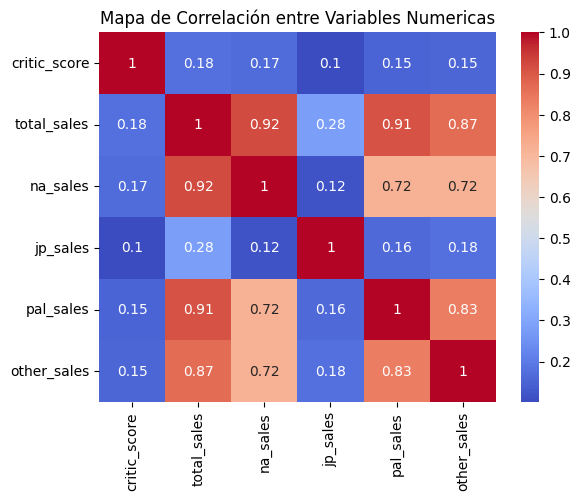

In [72]:
# Seleccionar las columnas numericas
numeric_columns = ['critic_score', 'total_sales', 'na_sales', 'jp_sales', 'pal_sales', 'other_sales']

# Crear un heatmap
plt.figure()
sns.heatmap(df[numeric_columns].corr(), annot=True, cmap='coolwarm')

plt.title('Mapa de Correlación entre Variables Numericas')
plt.show()

#Se puede observar una fuerte correlacion entre na_sales, pal_sales y other_sales, que nos indican que esos mercados tienen un gusto similar en los videojuegos
#Mientras que las ventas en japon estan debilmente correlacionadas con las otras, tambien se ve que el critic_score no presenta una correlacion fuerte con ninguna
#de las otras variables numericas

### Prediccion de Ventas

In [84]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
df_train = df.dropna(subset=['critic_score'])
X= np.array(df_train['critic_score']).reshape(-1,1)
y = np.array(df_train['total_sales']).reshape(-1,1)


In [86]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Hacer predicciones
y_pred = modelo.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nError Cuadrático Medio (MSE): {mse}")
print(f"Coeficiente de Determinación (R²): {r2}")

print(f"Intercepcion: {modelo.intercept_}")
print(f"Coeficiente: {modelo.coef_}")


Error Cuadrático Medio (MSE): 1.3796505066138012
Coeficiente de Determinación (R²): 0.03479505469356414
Intercepcion: [-0.53266809]
Coeficiente: [[0.13538011]]
